**Author: Heet Navsariwala**

I wrote all of the explanatory text and comments in this notebook. tweets2019 dataset is used from https://www.kaggle.com/kavita5/twitter-dataset-avengersendgame and the tweets2021 dataset extracted myself using the ExtractTweets.ipynb file written by me adapting from twitter's official api documentation. Some of the code was adapted from https://textblob.readthedocs.io/en/dev/quickstart.html and https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

# **Introduction**

Sentiment analysis is the systematic identification, extraction, quantification, and study of emotional states and subjective information using natural language processing, text analysis, computational linguistics, and biometrics. Sentiment analysis is commonly used in marketing and customer service to analyze voice of the customer materials such as reviews and survey replies, as well as online and social media.

This project uses TextBlob for sentiment analysis. TextBlob is a NLP Python library. It actively makes use of NLTK (Natural Language ToolKit). NLTK gives easy access to many lexical resources and allows users to deal with categorization, classification and many such tasks. TextBlob supports complex analysis and operation on textual data.

TextBlob is a library that returns polarity and subjectivity of a sentence. This project does not make use of subjectivity. The polarity of a sentence lies between (-1, 1) , where -1 defines a negative sentiment and 1 defines a positive sentiment. Here we classify the tweets into 3 catefories based on polarity - positive if greater than 0, negative if less than 0 and neutral otherwise.

The visualization tools used in this project are the Python libraries matplotlib to plot bar graphs and wordcloud to generate wordclouds based on the frequency of words.

In this project, we are analyzing tweets from 2 different years that reference the Marvel Cinematic Universe - 2019 and 2021. These tweets are extracted from Twitter directly using the Twitter API. This sentiment analysis will help us visualize the changes in people's sentiments on the Marvel Cinematic Universe and some of the most talked about things in the MCU.

# **Initialization**

Here we initialize the library files and nltk components that will be required later. We also load the datasets to pandas dataframes which will be further operated on in subsequent code blocks. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data processing/manipulation
import re

# data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# stopwords, tokenizer, stemmer
import nltk  
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')

# spell correction, lemmatization
from textblob import TextBlob
from textblob import Word

# Loading each dataset
data2019 = pd.read_csv('tweets2019.csv', lineterminator='\n', encoding='cp1252')
data2021 = pd.read_csv('tweets2021.csv', lineterminator='\n')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Here we get rid of the columns in our data frames that are not needed and null rows which don't contribute to the analysis.

In [2]:
# Remove unneeded columns and null rows
data2019 = data2019[['created','tweet']]
data2019 = data2019.dropna()

data2021 = data2021[['created','tweet']]
data2021 = data2021.dropna()


# **Pre-Processing Tweets**

Now we need to pre process the text in the tweets. Tweets could have links to particular websites or images. We need to remove these characters to get a better accuracy of sentiments. We also need to remove any special characters or punctuations. Numbers do not contribute to sentiment analysis, and also stopwords do not. So we need to get rid of these things.
Its also better to keep uniform text, so we convert all tweets to lowercase.
Some words are modified and make it difficult to determine sentiment, so we use a Porter Stemmer to get the root word.

In [3]:
# Function to clean and pre process text

to_remove = r'\d+|http?\S+|[^A-Za-z0-9]+'
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Function to preprocess tweet 
def clean_tweet(tweet, stem=False, lemmatize=False):

    # Make all text lowercase
    tweet = tweet.lower()
    
    # Remove links, special characters, punctuation, numbers, etc.
    tweet = re.sub(to_remove, ' ', tweet)
        
    cleaned_tweet = []
    words = word_tokenize(tweet) 

    # Remove stopwords and stem
    for word in words:
        if not word in stop_words:
            if stem:
                cleaned_tweet.append(ps.stem(word))
            elif lemmatize:
                cleaned_tweet.append(Word(word).lemmatize())
            else:
                cleaned_tweet.append(word)
            
    return cleaned_tweet

In [4]:
# Cleaning tweets
 
data2019['cleanedTweet'] = data2019.tweet.apply(lambda x: clean_tweet(x))
data2019

data2021['cleanedTweet'] = data2021.tweet.apply(lambda x: clean_tweet(x))
data2021

,created,tweet,cleanedTweet
0,12/14/2021,@NetflxUpdates @BingeWatchThis_ SpongeBob and ...,"[netflxupdates, bingewatchthis, spongebob, pat..."
1,12/14/2021,"Venus showed me sang-chi, iron man, and beginn...","[venus, showed, sang, chi, iron, man, beginnin..."
2,12/14/2021,RT @SammySmilesCo: Man. 3D printing is just am...,"[rt, sammysmilesco, man, printing, amazing, ac..."
3,12/14/2021,@TheGiantCassatt It was sad/funny I avoided sp...,"[thegiantcassatt, sad, funny, avoided, spoiler..."
4,12/14/2021,the rumor that i just saw that they bring back...,"[rumor, saw, bring, back, iron, man, movie, ye..."
...,...,...,...
19995,12/9/2021,@_Rewhan You say this yet Elon Musk plays hims...,"[rewhan, say, yet, elon, musk, plays, iron, man]"
19996,12/9/2021,If we take away rings here Brady and Montana a...,"[take, away, rings, brady, montana, worse, qbs..."
19997,12/9/2021,I'm bringing the party to you. \n\n[Iron Man l...,"[bringing, party, iron, man, leads, monstrous,..."
19998,12/9/2021,RT @channel_pup: It's not canon. I know some p...,"[rt, channel, pup, canon, know, people, gon, n..."


# **Sentiment Analysis**

We now determine polarity of words using the TextBlob feature. Depending on the polarity of the text, we classify the tweets into either of 3 classes positive, negative or neutral.

In [5]:
# Function to determine sentiments
def sentiment_analysis(df):
    
    # Determine polarity
    df['Polarity'] = df['cleanedTweet'].apply(lambda x: TextBlob(' '.join(x)).sentiment.polarity)
    
    # Classify overall sentiment
    df.loc[df.Polarity > 0,'Sentiment'] = 'positive'
    df.loc[df.Polarity == 0,'Sentiment'] = 'neutral'
    df.loc[df.Polarity < 0,'Sentiment'] = 'negative'
    
    return df[['tweet', 'cleanedTweet', 'Polarity', 'Sentiment']]

In [6]:
sentiment_analysis(data2019)

,tweet,cleanedTweet,Polarity,Sentiment
0,RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...,"[rt, mrvelstan, literally, nobody, avengersend...",0.000,neutral
1,"RT @agntecarter: i’m emotional, sorry!!\r\n\r\...","[rt, agntecarter, emotional, sorry, x, blackwi...",-0.250,negative
2,saving these bingo cards for tomorrow \r\n©\r\...,"[saving, bingo, cards, tomorrow, avengersendgame]",0.000,neutral
3,RT @HelloBoon: Man these #AvengersEndgame ads ...,"[rt, helloboon, man, avengersendgame, ads, eve...",0.000,neutral
4,"RT @Marvel: We salute you, @ChrisEvans! #Capta...","[rt, marvel, salute, chrisevans, captainameric...",0.000,neutral
...,...,...,...,...
14995,RT @natsdany: First time Last...,"[rt, natsdany, first, time, last, time, avenge...",0.125,positive
14996,RT @MTVNEWS: The #AvengersEndgame cast has see...,"[rt, mtvnews, avengersendgame, cast, seen, lot...",-0.400,negative
14997,@SPICinemas kindly announce the approximate ti...,"[spicinemas, kindly, announce, approximate, ti...",0.100,positive
14998,"RT @Marvel: We salute you, @ChrisEvans! #Capta...","[rt, marvel, salute, chrisevans, captainameric...",0.000,neutral


In [7]:
sentiment_analysis(data2021)

,tweet,cleanedTweet,Polarity,Sentiment
0,@NetflxUpdates @BingeWatchThis_ SpongeBob and ...,"[netflxupdates, bingewatchthis, spongebob, pat...",0.000000,neutral
1,"Venus showed me sang-chi, iron man, and beginn...","[venus, showed, sang, chi, iron, man, beginnin...",0.000000,neutral
2,RT @SammySmilesCo: Man. 3D printing is just am...,"[rt, sammysmilesco, man, printing, amazing, ac...",0.283333,positive
3,@TheGiantCassatt It was sad/funny I avoided sp...,"[thegiantcassatt, sad, funny, avoided, spoiler...",-0.028333,negative
4,the rumor that i just saw that they bring back...,"[rumor, saw, bring, back, iron, man, movie, ye...",0.175000,positive
...,...,...,...,...
19995,@_Rewhan You say this yet Elon Musk plays hims...,"[rewhan, say, yet, elon, musk, plays, iron, man]",0.000000,neutral
19996,If we take away rings here Brady and Montana a...,"[take, away, rings, brady, montana, worse, qbs...",-0.233333,negative
19997,I'm bringing the party to you. \n\n[Iron Man l...,"[bringing, party, iron, man, leads, monstrous,...",0.000000,neutral
19998,RT @channel_pup: It's not canon. I know some p...,"[rt, channel, pup, canon, know, people, gon, n...",-0.150000,negative


# **Plotting graphs**

Now we plot the number of tweets against the sentiment using matplotlib libraries. From this we can visualize what proportions of people like or dislike a particular subject which in this case is the Marvel Cinematic Universe.

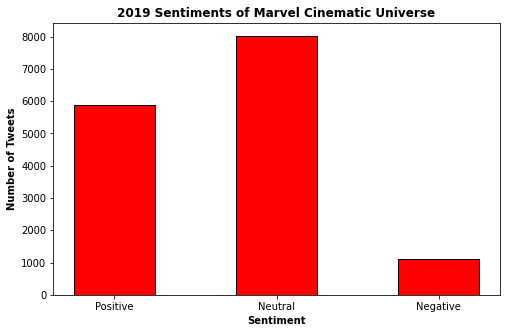

In [8]:
# Plotting number of tweets with respective sentiments for tweets from 2019
mcu19_pos = len(data2019.loc[data2019.Sentiment=='positive'])
mcu19_neu = len(data2019.loc[data2019.Sentiment=='neutral'])
mcu19_neg = len(data2019.loc[data2019.Sentiment=='negative'])

graphdata_19 = {'Positive':mcu19_pos,'Neutral':mcu19_neu,'Negative':mcu19_neg}
sentiment_19 = list(graphdata_19.keys()) 
num_tweets_19 = list(graphdata_19.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_19, num_tweets_19, color ='red', width = 0.5, edgecolor='black',) 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of Tweets", fontweight ='bold') 
plt.title("2019 Sentiments of Marvel Cinematic Universe", fontweight ='bold') 
plt.show() 

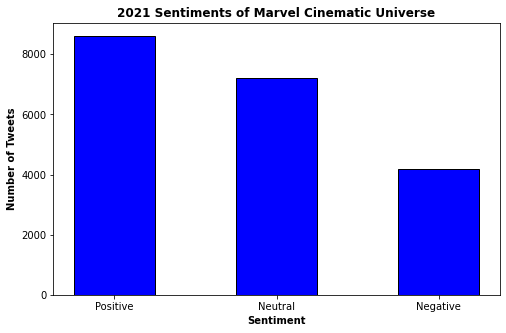

In [9]:
# Plotting number of tweets with respective sentiments for tweets from 2021
mcu21_pos = len(data2021.loc[data2021.Sentiment=='positive'])
mcu21_neu = len(data2021.loc[data2021.Sentiment=='neutral'])
mcu21_neg = len(data2021.loc[data2021.Sentiment=='negative'])

graphdata_21 = {'Positive':mcu21_pos,'Neutral':mcu21_neu,'Negative':mcu21_neg}
sentiment_21 = list(graphdata_21.keys()) 
num_tweets_21 = list(graphdata_21.values()) 

plt.figure(figsize = (8, 5)) 

plt.bar(sentiment_21, num_tweets_21, color ='blue', width = 0.5, edgecolor='black') 

plt.xlabel("Sentiment", fontweight ='bold') 
plt.ylabel("Number of Tweets", fontweight ='bold') 
plt.title("2021 Sentiments of Marvel Cinematic Universe", fontweight ='bold') 
plt.show() 

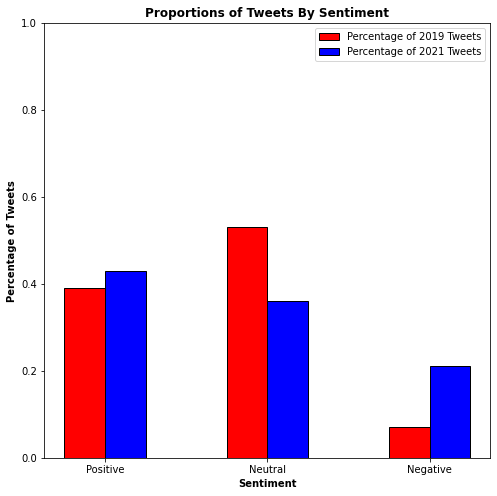

In [10]:
# Calculate relative percentages by sentiment - 2019
total_tweets_19 = len(data2019.Sentiment)
prop_tweets_19 = list(map(lambda x: round(x/total_tweets_19,2), num_tweets_19))

# Calculate relative percentages by sentiment - 2021
total_tweets_21 = len(data2021.Sentiment)
prop_tweets_21 = list(map(lambda x: round(x/total_tweets_21,2), num_tweets_21))

# Graphing relative percentages of both 2019 and 2021 tweets
bar_width = 0.25
plt.subplots(figsize=(8,8))

br1 = np.arange(3) 
br2 = [x + bar_width for x in br1] 

t = plt.bar(br1, prop_tweets_19, color ='r', width = bar_width, 
            edgecolor ='black', label ='2019') 
b = plt.bar(br2, prop_tweets_21, color ='b', width = bar_width, 
            edgecolor ='black', label ='2021') 
   
plt.xlabel('Sentiment',fontweight ='bold') 
plt.ylabel('Percentage of Tweets',fontweight ='bold') 
plt.xticks([r + bar_width/2 for r in range(3)],['Positive','Neutral','Negative'])
plt.legend([t,b],['Percentage of 2019 Tweets','Percentage of 2021 Tweets'])
plt.ylim(0.0, 1.0)
plt.title('Proportions of Tweets By Sentiment',fontweight ='bold')

plt.show()

# **Plotting WordCloud**

We plot a wordcloud of positive tweets to understand the trending words among the general audience. From this we can infer the most popular parts of a particular topic which in this case are popular characters or actors from Marvel Cinematic Universe 

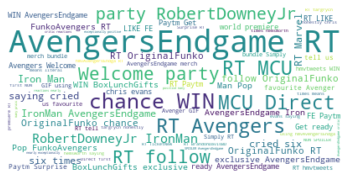

In [11]:
text2019pos = ' '.join([Tweet for Tweet in data2019[data2019['Sentiment']=='positive']['tweet']])
text2019pos = re.sub(to_remove, ' ', text2019pos)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(text2019pos)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

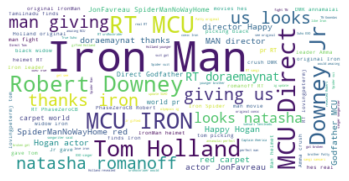

In [12]:
text2021pos = ' '.join([Tweet for Tweet in data2021[data2021['Sentiment']=='positive']['tweet']])
text2021pos = re.sub(to_remove, ' ', text2021pos)

# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(text2021pos)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **Conclusion**

The visualization techniques used here give the following inferences:


*   The Marvel Cinematic Universe is just as well liked if not more in 2021 as it was when Avengers: Endgame released in 2019.
*   A significant more percentage of people were on the edge in 2019 than currently in 2021 where more people can be seen either leaning to positive or negative.
*   Apart from the movie title Avengers: Endgame, Iron Man / Robert Downey Jr seems to be the most talked about topic on twitter in 2019.
*   In 2021, just before the release of Spiderman: No Way Home, the character most talked about still is Iron Man which shows how much people love the character. 

Additionally to this project, using user data, we can use visualization techniques to interpret the data by specific demographics like classifying the users by age to understand the general demographics that like the Marvel Cinematic Universe. They can also be classified based on the countries where the tweets originate from, to gain information about which countries like Marvel Cinematic Universe and will possibly like more movies in the future to make business decisions on greenlighting specific movies and how much to invest in distribution costs in a particular country. The tweets can also be visulalized based on race or ethnicity of user to make decisions on including more diversity in future projects.
The wordclouds can be used to see what characters or ideas people are interested in and make production decisions on including such characters or ideas in future projects at the planning stage.  





# **Bibliography**



*   https://www.kaggle.com/kavita5/twitter-dataset-avengersendgame
*   https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
*   https://www.datacamp.com/community/tutorials/wordcloud-python
*   https://stackoverflow.com/questions/29498652/plot-bar-graph-from-pandas-dataframe



